<a href="https://colab.research.google.com/github/annaliese-estes/techxchange-lab-2024/blob/main/Qiskit_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Qiskit Runtime Lab

Instructors:  
Annaliese Estes  
James Weaver

Email:  
annaliese.estes@ibm.com  
james.weaver@ibm.com

## Introducing this hands on lab

This hands-on lab is a gentle introduction to quantum computing with Qiskit. This lab leverages some the latest innovations from IBM Quantum, such as Qiskit Runtime, and will help you get up to speed on the following topics and skills:

- Creating quantum circuits:
    - Visually, using the IBM Quantum Composer
    - Procedurally, using Python and the Qiskit library
- Executing quantum circuits from the Composer, and by using Qiskit Runtime Primitives
- Leveraging the Qiskit Sampler primitive
- Executing circuits on IBM Quantum computers

Along the way, we'll introduce you to the brand new IBM Quantum platform, which is continually being augmented and improved. There are links to specific resources on the platform in which you'll implement the instructions of this hands-on lab as well as gain information helpful in carrying out those steps. *Note: You may find it helpful to open these links in separate tabs so that this syllabus remains open.*

You may access this lab at any time at *link* so don't be concerned about finishing in the allotted time. It is often better to spend time internalizing concepts than to rush through the learning process. We'll begin the journey with an overview of the IBM Quantum platform.

## Surveying the IBM Quantum Platform

Go ahead and sign in to [IBM Quantum](https://quantum.ibm.com), creating an account if you don't already have one. Then, let's take some time to get familiar with the IBM Quantum platform, beginning with clicking the "nine dot" icon in the upper right corner of its interface and briefly visiting the Platform, Documentation and Learning options.

Let's continue the journey by creating a quantum circuit in the IBM Quantum Composer.

## Creating a quantum circuit in the IBM Quantum Composer

Go ahead and navigate to the IBM Quantum Composer from the IBM Quantum platform by selecting Learning from the “nine dot” icon, and then selecting Composer from the IBM Quantum Learning page options. When you are in the IBM Quantum Composer, perform the following steps:

1. Open the Composer docs & tutorials slide-out pane on the left

2. Select the Create your first circuit walkthrough option, clicking Next to visit each step in the process.

3. Now you will create your own circuit, using the foundation you created during the walkthrough. Instead of the two-qubit ϕ+ Bell state shown in the walkthrough, create a two-qubit ψ− Bell state, also called a singlet Bell state. Hint: Strategically placed X and Z gates will turn the ϕ+ Bell state into a ψ− Bell state. You can learn about each of the 4 different Bell states from the [Basics of Quantum Information page.](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states) Please ask for help if you're stuck, as this step can be overwhelming to folks new to quantum computing.

4. The resultant Probabilities histogram visualization should indicate 50% probabilities of the 01 and 10 computational basis states being the result of measuring the quantum state.

5. The resultant Statevector histogram and Q-sphere visualizations (after temporarily removing the measurement operations) should indicate that the amplitudes and probabilities of the 01 and 10 computational basis states are equal to each other, but in opposite phases.

*Note: If you'd like to learn more, select the "Explore the latest updates option", clicking Next to learn about each new feature.*

Nice work! Let's move on to executing your quantum circuit from the IBM Quantum Composer.

## Executing your quantum circuit from the IBM Quantum Composer

To execute your quantum circuit from the IBM Quantum Composer, perform the following steps:

1. Click the Setup and Run button located near the upper right corner of the interface.

2. A pane labeled Setup and run your circuit should slide out from the right.

3. Choose a quantum system to run the circuit on. You'll want to choose a system with the lowest number of pending jobs.

4. Click the Run on button in the lower right corner of the interface.

5. Click on the circular Composer jobs icon on the left side of the interface to see details about your job. Notice how the circuit looks different from how you laid it out on the Composer- this is because it has been transpiled to the native gate set, and laid out in an optimal fashion, for the quantum computer that you've chosen.

6. When the job is finished, the Status timeline should indicate that it has Completed.

7. Click the "Details", "Results" and "See more details" controls to learn what information about the job is available.

8. Before you leave the IBM Quantum Composer, notice that the OpenQASM code that can create your circuit is shown in the rightmost pane. Clicking on the OpenQASM label and choosing Qiskit will reveal Python code that can create your circuit.

Awesome! Next we'll explore how to create and run quantum circuits using Python, Qiskit libraries, and Qiskit Runtime.

## Understanding Qiskit Primitives, and choosing your coding environment

Here's a great [introduction](https://docs.quantum.ibm.com/guides/primitives) to Qiskit Runtime Primitives within the Qiskit Documentation.

When working with Qiskit, you can use any environment where you have Python installed. For today's lab, please use [Google Colab](https://colab.research.google.com/).

## Creating and running quantum circuits using Python and the Qiskit SDK

Using your chosen environment, please populate that environment with the code in the following section.

# Magic 8 Ball

Here, we will build a Magic 8 Ball program that randomly returns 1 of 8 possible responses. How do we use quantum computing to generate a random number? Computational space scales exponentially in quantum computing. Thus, if we need a random result out of 8 possibilities, our program needs to take a measurement of a quantum state vector that consists of 8 basis states, which represent the computational space of 3 qubits in an equal superposition.

## Qiskit Patterns: Map Problem to Quantum Circuits and Operators

We can think of this step as mapping our problem to be run on a quantum computer. This step needs to be done for any quantum computation, because our instinct is to think of problems in a classical way, while quantum computers work differently.

Problem:
I need a program to generate a random number out of 8.

Mapping to a classical computer: generate a random integer in range(1,9)

Mapping to a quantum computer: put 3 qubits into an equal superposition, which creates a quantum state vector with 8 basis states, each with an equal probability of being the result of a measurement

Because we aren't running on real hardware in this case, we won't be following the rest of the steps in [Qiskit Patterns](https://docs.quantum.ibm.com/guides/intro-to-patterns). However, later in this lab, we will introduce the final 3 steps: optimization, execution, and post-processing.

In [ ]:
# install Qiskit with visualization

!pip install qiskit[visualization]

In [ ]:
# install additional packages

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import StatevectorSampler

In [ ]:
# define Magic 8 Ball responses

responses = ["Yes", "Definitely", "Not today", "Try again", "Not likely", "Answer unclear", "Outlook not so good", "Signs point to yes"]

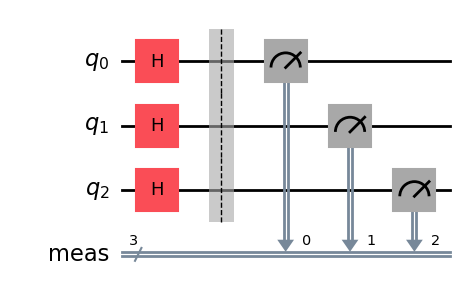

In [ ]:
# set up our Quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# place a Hadamard gate on qubits 0, 1, and 2
qc.h(0)
qc.h(1)
qc.h(2)

# take a measurement
qc.measure_all()

qc.draw("mpl")

In [ ]:
# invoke the Sampler and display resulting measurement

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'101': 1}


In [ ]:
# accessing the first key of the dict item containing our results

first_key = list(counts_sampler.keys())[0]

# turning that string into an integer
# result is given in base 2, so we need to communicate that because the int() function assumes base 10 as default

integer_value = int(first_key, 2)

print(responses[integer_value])

Answer unclear


### Developing a program that leverages the Qiskit Sampler primitive

Now it's time to get your hands dirty with Python and Qiskit code. Your initial assignment, should you choose to accept it, will be to develop a program that samples one chocolate candy from a box that contains two pieces. The circuit that chooses a chocolate utilizes a singlet Bell state.

Bell circuits are specific circuits which generate Bell states, or EPR pairs, a form of entangled and normalized basis vectors. In other words, they are the circuits we use to generate entangled states, a key ingredient in quantum computations.

There exist 4 different Bell states. You can learn about each from the [Basics of Quantum Information page.](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states)

Your Task: please build a circuit that generates the  |𝜓−⟩  Bell state.


In [ ]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.z(0)
qc.x(1)
qc.measure_all()

qc.draw()

┌───┐     ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■──┤ Z ├─░─┤M├───
        └───┘┌─┴─┐├───┤ ░ └╥┘┌─┐
   q_1: ─────┤ X ├┤ X ├─░──╫─┤M├
             └───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════╩══╩═
                           0  1

In [ ]:
# Invoke the Sampler and display the results

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 505, '10': 495}


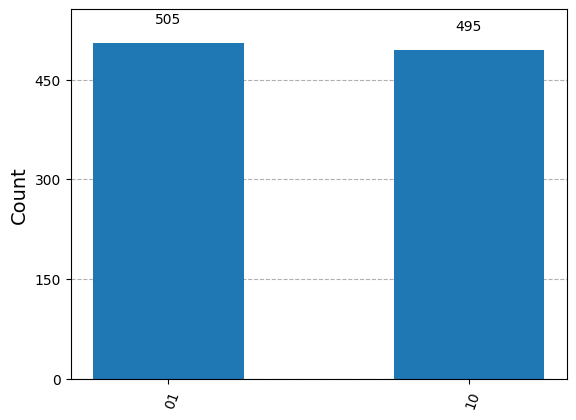

In [ ]:
plot_histogram(counts_sampler)

For an additional challenge, please develop a program that samples one chocolate candy from a box that contains three pieces. The circuit that chooses a chocolate utilizes a W-state, in this case consisting of three qubits.

Next, we will develop a slightly more complicated circuit. Similarly to Bell states circuit producing Bell states, W-state circuits produce W states. Although Bell states entangle two qubits, W-states entangle three qubits. We will provide some specifics of the operation for today. If you are interested in learning more about W-states, check out this [Wikipedia article.](https://en.wikipedia.org/wiki/W_state)

To build our W-state, we will follow 6 simple steps:
- Initialize our 3 qubit circuit
- Perform an Ry rotation on our qubit. The specifics of this operation are provided.
- Perform a controlled hadamard gate on qubit 1, with control qubit 0
- Add a CNOT gate with control qubit 1 and target qubit 2
- Add a CNOT gate with control qubit 0 and target qubit 1
- Add a X gate on qubit 0

In [ ]:
# Let's create and draw a W-state circuit

qc = QuantumCircuit(3)

qc.ry(1.91063324, 0)

# below is filled in for purposes of testing the lab, on the day of we will have them fill this in themselves

qc.ch(0, 1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.x(0)
qc.measure_all()

qc.draw()

┌────────────┐               ┌───┐ ░ ┌─┐      
   q_0: ┤ Ry(1.9106) ├──■─────────■──┤ X ├─░─┤M├──────
        └────────────┘┌─┴─┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐   
   q_1: ──────────────┤ H ├──■──┤ X ├──────░──╫─┤M├───
                      └───┘┌─┴─┐└───┘      ░  ║ └╥┘┌─┐
   q_2: ───────────────────┤ X ├───────────░──╫──╫─┤M├
                           └───┘           ░  ║  ║ └╥┘
meas: 3/══════════════════════════════════════╩══╩══╩═
                                              0  1  2

In [ ]:
# Invoke the Sampler and display results

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=1000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'001': 344, '010': 351, '100': 305}


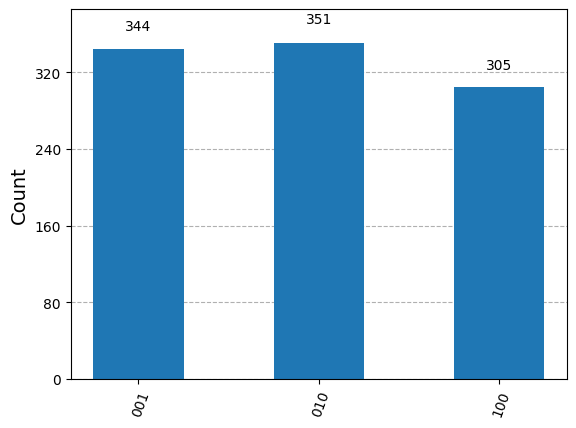

In [ ]:
plot_histogram(counts_sampler)

# Next Steps
Congratulations on completing this introductory Qiskit Runtime Lab! Let's recap what you've learned so far:
1. **IBM Quantum Platform Overview**
   - Explored the platform's interface
   - Familiarized with Documentation and Learning sections
2. **IBM Quantum Composer**
   - Created a quantum circuit visually (two-qubit ψ− Bell state)
   - Executed the circuit and interpreted results through visualizations
3. **Quantum Circuit Creation and Execution**
   - Built a "Magic 8 Ball" program using a 3-qubit quantum circuit
   - Learned to use the Qiskit StatevectorSampler for circuit execution
4. **Creating Quantum States**
   - Created a circuit for the ψ− Bell state and sampled from it
   - Built a more complex W-state circuit with 3 qubits

Throughout these exercises, you've gained hands-on experience with quantum circuit design, execution, and result interpretation using both visual (Composer) and programmatic (Python/Qiskit) approaches.
Now that you have a solid foundation, let's explore some next steps to further your quantum computing journey. You might explore these now, if there is time remaining in today's lab, or any time in the future:

We encourage you to check out the [Qiskit "Hello World" problem](https://docs.quantum.ibm.com/guides/hello-world) run by Derek Wang as part of the Qiskit Youtube series: "Coding with Qiskit 1.0". We strongly encourage that you watch the linked video, rather than working through the code on your own. Derek talks through the Estimator Primitive, which we only briefly touched on today, and he also walks you through the 4 steps of Qiskit Patterns.

To continue your learning on your own, we recommend checking out the courses & tutorials on the [IBM Quantum Platform](https://quantum.ibm.com), and the [Qiskit Youtube channel](https://www.youtube.com/@qiskit).